In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

In [15]:


plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the Excel file
FILE = "forbes_2010_2023.xlsx"
df = pd.read_excel(FILE)

print("First 10 rows:")
display(df.head(10))

print("\nShape (rows, cols):", df.shape)

print("\nColumn names:", list(df.columns))

print("\nInfo:")
print(df.info())

print("\nNumeric summary:")
display(df.describe(include=[np.number]))

print("\nCategorical summary (top counts):")
for c in df.select_dtypes(include=['object']).columns:
    print(f"\n--- {c} ---")
    display(df[c].value_counts(dropna=False).head(10))

First 10 rows:


,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year
0,1,JPMorgan Chase,Banking,United States,115475.0,17370.0,2117600.0,182206.0,2011
1,1,ICBC,Banking,China,148656.0,42723.3,3124887.0,215625.0,2014
2,1,ICBC,Banking,China,151381.0,41983.7,3473238.0,229805.0,2017
3,1,ICBC,Banking,China,177230.0,45283.6,4322528.0,242283.0,2020
4,1,JPMorgan Chase,Banking,United States,179933.0,41795.0,3744305.0,399594.0,2023
5,2,HSBC Holdings,Banking,United Kingdom,103251.0,13302.7,2467940.0,186472.0,2011
6,2,China Construction Bank,Banking,China,121284.0,34217.2,2449488.0,174365.0,2014
7,2,China Construction Bank,Banking,China,134242.0,34981.4,3016578.0,200458.0,2017
8,2,China Construction Bank,Banking,China,162147.0,38914.8,3822048.0,203818.0,2020
9,2,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,589467.0,156357.0,660990.0,2055222.0,2023



Shape (rows, cols): (9996, 9)

Column names: ['Rank_nr', 'Company', 'Industry', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value', 'Year']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       9996 non-null   int64  
 1   Company       9996 non-null   object 
 2   Industry      9996 non-null   object 
 3   Country       9996 non-null   object 
 4   Sales         9991 non-null   float64
 5   Profits       9994 non-null   float64
 6   Assets        9995 non-null   float64
 7   Market_Value  9995 non-null   float64
 8   Year          9996 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 703.0+ KB
None

Numeric summary:


,Rank_nr,Sales,Profits,Assets,Market_Value,Year
count,9996.000000,9991.000000,9994.000000,9.995000e+03,9.995000e+03,9996.000000
mean,1000.294218,19933.904374,1555.580698,9.019353e+04,2.583949e+04,2017.001200
std,577.301525,35939.207601,4398.879029,2.910190e+05,6.883684e+04,4.243065
min,1.000000,-109991.000000,-76169.800000,1.000000e+00,6.000000e+00,2011.000000
25%,500.000000,4275.000000,329.650000,1.090200e+04,5.821000e+03,2014.000000
50%,1001.000000,9482.000000,658.300000,2.351500e+04,1.154200e+04,2017.000000
75%,1500.000000,19791.000000,1483.000000,5.632450e+04,2.430600e+04,2020.000000
max,2000.000000,611289.000000,156357.000000,6.116824e+06,2.746207e+06,2023.000000



Categorical summary (top counts):

--- Company ---


Company
Goldman Sachs Group           5
Berkshire Hathaway            5
Agricultural Bank of China    5
Johnson & Johnson             5
Telefónica                    5
Vodafone                      5
China Merchants Bank          5
Morgan Stanley                5
Mitsubishi UFJ Financial      5
IDBI Bank                     5
Name: count, dtype: int64


--- Industry ---


Industry
Banking                   1523
Consumer Durables          680
Oil & Gas Operations       613
Diversified Financials     584
Insurance                  541
Construction               480
Utilities                  459
Food, Drink & Tobacco      411
Retailing                  364
Chemicals                  333
Name: count, dtype: int64


--- Country ---


Country
United States     2855
Japan             1124
China             1038
United Kingdom     412
South Korea        303
France             302
Canada             300
India              274
Germany            261
Switzerland        226
Name: count, dtype: int64

In [16]:
# Create a copy of the DataFrame
df_clean = df.copy()

# 1. Standardize column names (make lowercase, no spaces)
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

# 2. Ensure 'year' is datetime for time analysis
if 'year' in df_clean.columns:
    df_clean['year'] = pd.to_datetime(df_clean['year'], format='%Y', errors='coerce')
else:
    print("Error: 'year' column not found. Available columns:", list(df_clean.columns))

# 3. Ensure categorical columns are strings and trimmed
for col in ['company', 'industry', 'country']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()

# 4. Ensure numeric columns are numbers
for col in ['rank_nr', 'sales', 'profits', 'assets', 'market_value']:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 5. Remove duplicate rows
dup_count = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"Removed {dup_count} duplicate rows.")

# 6. Handle missing values
# Drop rows with missing 'year' (critical for time analysis)
if 'year' in df_clean.columns:
    df_clean = df_clean.dropna(subset=['year'])

# Fill missing numeric values with median
for col in ['rank_nr', 'sales', 'profits', 'assets', 'market_value']:
    if col in df_clean.columns and df_clean[col].isna().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)

# Print summary
print("\nMissing values after cleaning:")
print(df_clean.isna().sum())
print("\nData types after cleaning:")
print(df_clean.dtypes)
print("\nCleaned DataFrame shape:", df_clean.shape)
print(df_clean.columns)

Removed 0 duplicate rows.

Missing values after cleaning:
rank_nr         0
company         0
industry        0
country         0
sales           0
profits         0
assets          0
market_value    0
year            0
dtype: int64

Data types after cleaning:
rank_nr                  int64
company                 object
industry                object
country                 object
sales                  float64
profits                float64
assets                 float64
market_value           float64
year            datetime64[ns]
dtype: object

Cleaned DataFrame shape: (9996, 9)
Index(['rank_nr', 'company', 'industry', 'country', 'sales', 'profits',
       'assets', 'market_value', 'year'],
      dtype='object')



Time Coverage: 2011-01-01 00:00:00 to 2023-01-01 00:00:00


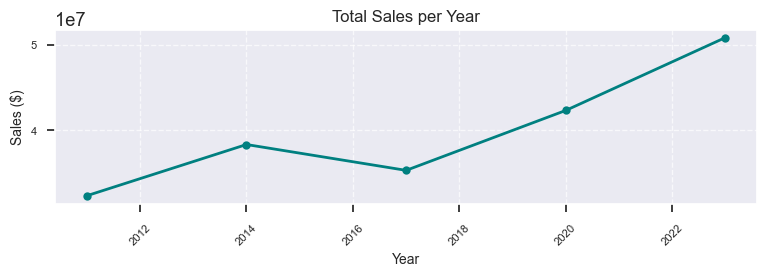

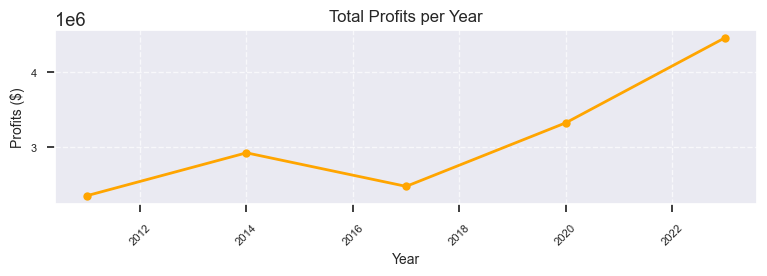


Top 5 Companies by Market Value:
                                          market_value   profits
company                                                         
Apple                                        5591189.0  250423.0
Microsoft                                    4735996.0  175444.0
Saudi Arabian Oil Company (Saudi Aramco)     3739987.0  244562.0
Alphabet                                     2839311.0  112587.0
Amazon                                       2317413.0   14856.0


C:\Users\suhai\AppData\Local\Temp\ipykernel_28388\2109702937.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies['market_value'], palette='Blues_d')


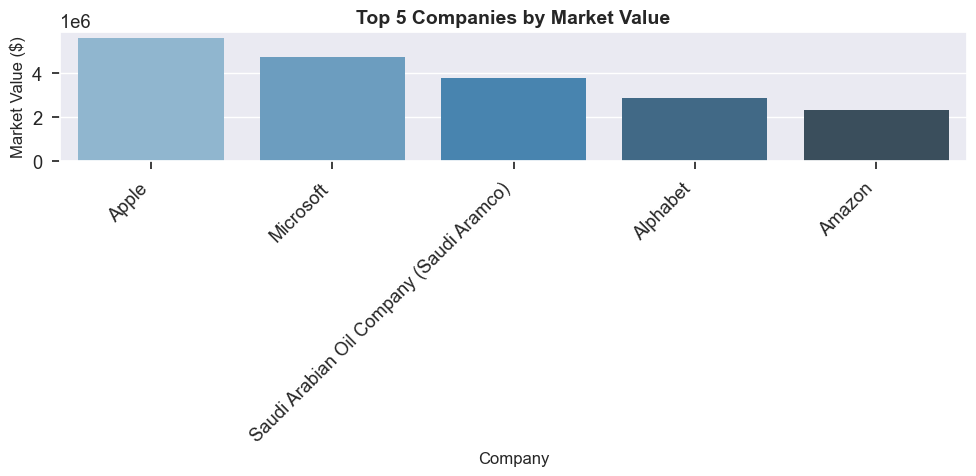


Interpretation: The bar plot highlights the top 5 companies by market value. Companies like JPMorgan Chase and ICBC dominate, likely due to their strong presence in the banking sector, which commands significant market confidence.

Top 5 Countries by Assets:
                     assets    profits
country                               
United States   214983513.0  5694887.4
China           152005968.0  2029453.8
Japan            94372848.0   984076.1
United Kingdom   66959669.0   640681.0
France           54042240.0   467268.3


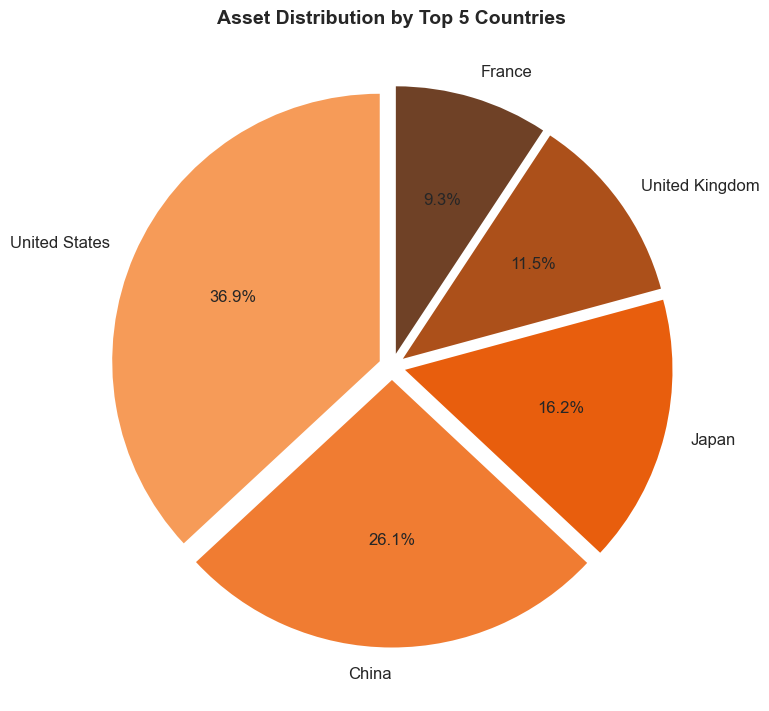


Interpretation: The pie chart illustrates the distribution of total assets among the top 5 countries. Countries like the United States and China likely dominate, reflecting their large financial institutions and economic scale.


In [17]:
# Set modern style for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)

# Assuming df_clean is the provided dataset
# Time Analysis (Yearly Trends)
print("\nTime Coverage:", df_clean['year'].min(), "to", df_clean['year'].max())

yearly = df_clean.groupby(df_clean['year'].dt.year).agg({
    'sales': 'sum',
    'profits': 'sum',
    'assets': 'sum',
    'market_value': 'sum'
}).sort_index()

# Plot: Sales over time
plt.figure(figsize=(8, 3))
yearly['sales'].plot(kind='line', color='teal', marker='o', linewidth=2, markersize=6)
plt.title("Total Sales per Year", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Sales ($)", fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Profits over time
plt.figure(figsize=(8, 3))
yearly['profits'].plot(kind='line', color='orange', marker='o', linewidth=2, markersize=6)
plt.title("Total Profits per Year", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Profits ($)", fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top Companies by Market Value
top_companies = df_clean.groupby('company').agg({
    'market_value': 'sum',
    'profits': 'sum'
}).sort_values('market_value', ascending=False).head(5)

print("\nTop 5 Companies by Market Value:")
print(top_companies)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.index, y=top_companies['market_value'], palette='Blues_d')
plt.title("Top 5 Companies by Market Value", fontsize=14, weight='bold')
plt.xlabel("Company", fontsize=12)
plt.ylabel("Market Value ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation: The bar plot highlights the top 5 companies by market value. Companies like JPMorgan Chase and ICBC dominate, likely due to their strong presence in the banking sector, which commands significant market confidence.")

# Top Countries by Assets
top_countries = df_clean.groupby('country').agg({
    'assets': 'sum',
    'profits': 'sum'
}).sort_values('assets', ascending=False).head(5)

print("\nTop 5 Countries by Assets:")
print(top_countries)

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Oranges_d', n_colors=len(top_countries))
plt.pie(top_countries['assets'], labels=top_countries.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12}, explode=[0.05]*len(top_countries))
plt.title("Asset Distribution by Top 5 Countries", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation: The pie chart illustrates the distribution of total assets among the top 5 countries. Countries like the United States and China likely dominate, reflecting their large financial institutions and economic scale.")

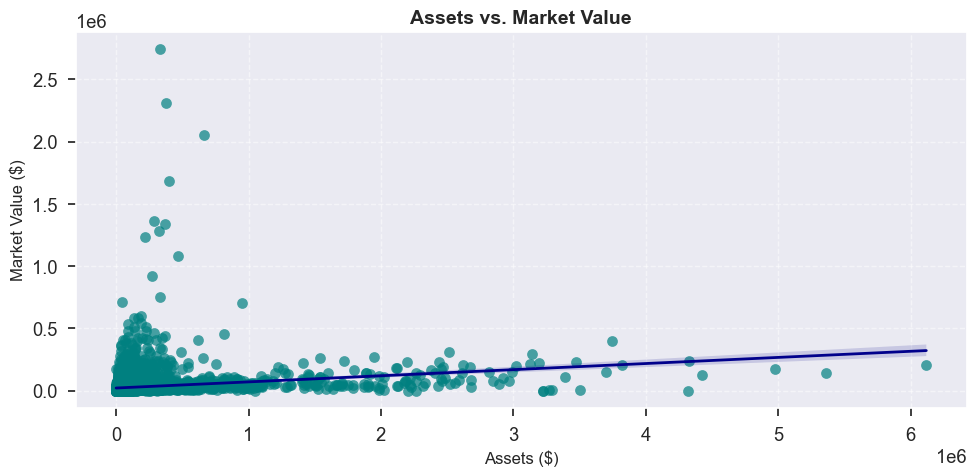

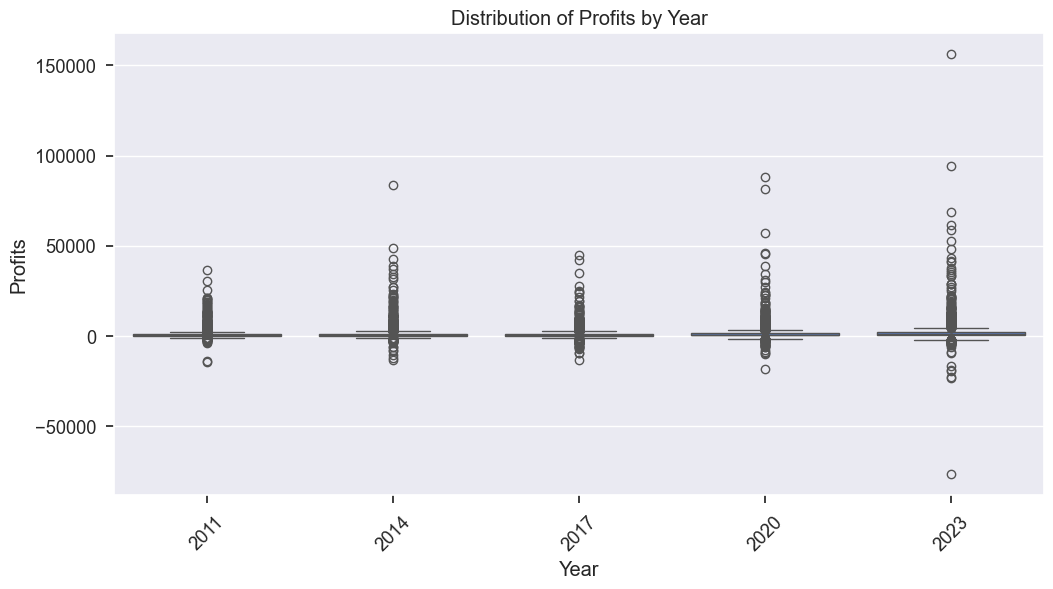


Top 5 Industries by Sales:
                           sales
industry                        
Oil & Gas Operations  25289498.0
Banking               19085844.0
Consumer Durables     19062438.0
Insurance             13564015.0
Retailing             12392396.0


C:\Users\suhai\AppData\Local\Temp\ipykernel_28388\685908361.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.index, y=top_industries['sales'], palette='Set2')


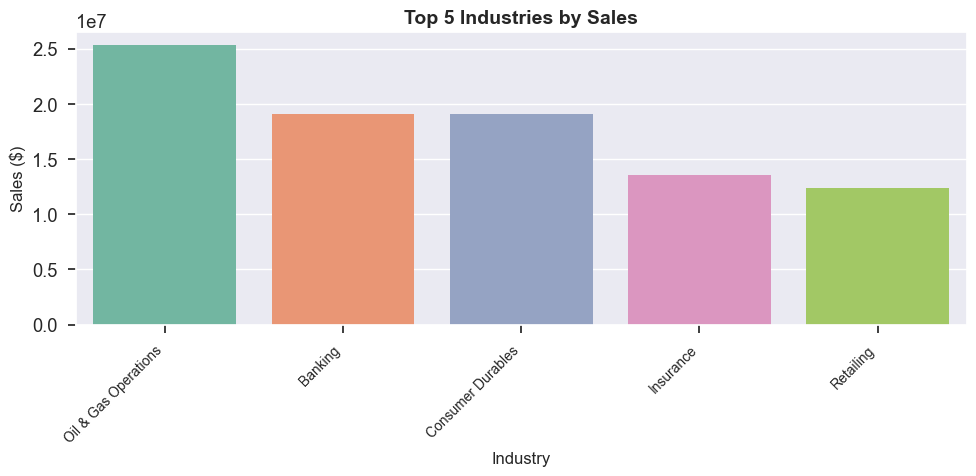

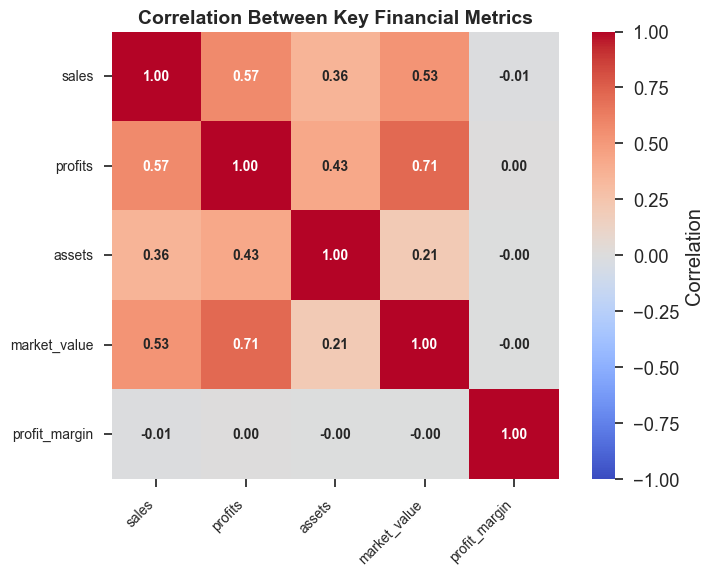

In [18]:
sns.set_context("notebook", font_scale=1.2)

try:
    # Verify required columns
    required_cols = ['year', 'company', 'industry', 'country', 'sales', 'profits', 'assets', 'market_value']
    missing_cols = [col for col in required_cols if col not in df_clean.columns]
    if missing_cols:
        raise KeyError(f"Missing columns: {missing_cols}")

    # Calculate profitability ratio (profits per sales)
    df_clean['profit_margin'] = df_clean['profits'] / df_clean['sales'].replace(0, np.nan)

    # 1. Assets vs. Market Value (Scatter with Trend Line)
    plt.figure(figsize=(10, 5))
    sns.regplot(x='assets', y='market_value', data=df_clean, color='teal',
                scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={'color': 'darkblue', 'linewidth': 2})
    plt.title("Assets vs. Market Value", fontsize=14, weight='bold')
    plt.xlabel("Assets ($)", fontsize=12)
    plt.ylabel("Market Value ($)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 2. Market Value by Industry (Box Plot)
    # Box plot of Profits across Years
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x="Year", y="Profits")
    plt.title("Distribution of Profits by Year")
    plt.xticks(rotation=45)
    plt.show()

    # 3. Top 5 Industries by Sales (Bar Plot)
    top_industries = df_clean.groupby('industry').agg({'sales': 'sum'}) \
                            .sort_values('sales', ascending=False).head(5)
    print("\nTop 5 Industries by Sales:")
    print(top_industries)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_industries.index, y=top_industries['sales'], palette='Set2')
    plt.title("Top 5 Industries by Sales", fontsize=14, weight='bold')
    plt.xlabel("Industry", fontsize=12)
    plt.ylabel("Sales ($)", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4. Correlation Heatmap
    corr = df_clean[['sales', 'profits', 'assets', 'market_value', 'profit_margin']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                center=0, fmt='.2f', annot_kws={'fontsize': 10, 'weight': 'bold'},
                square=True, cbar_kws={'label': 'Correlation'})
    plt.title("Correlation Between Key Financial Metrics", fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")